# 🌍 World Happiness Report 2015 – Data Analysis 📊

Welcome to this data analysis project based on the **World Happiness Report 2015**. In this project, we explore global happiness levels using data from over 150 countries.

The dataset includes key factors believed to influence happiness such as:
- **GDP per capita**
- **Social support (family)**
- **Health (life expectancy)**
- **Freedom to make life choices**
- **Trust (corruption perception)**
- **Generosity**

The goal is to understand how these factors correlate with happiness scores across different regions and countries. Let's dive into the insights! 🌟


## 🎯 Objectives

- Identify the top 10 happiest countries in 2015
- Explore how happiness scores vary across global regions
- Analyze relationships between happiness and factors like:
  - GDP
  - Health
  - Social support
  - Freedom and generosity
- Visualize the findings using clean and clear plots
- Summarize key insights based on the data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

## 📁 Dataset Overview

The dataset used is the **World Happiness Report 2015**, which includes the following columns:

- `Country`, `Region`, `Happiness Rank`, `Happiness Score`
- Economy (GDP per Capita)
- Family (Social Support)
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

It provides a global snapshot of the perceived happiness and the social-economic factors contributing to it.


In [ ]:
# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the data
import io
df = pd.read_csv(io.BytesIO(uploaded['2015.csv']))  # change the filename if needed
df.head()


Saving 2015.csv to 2015.csv


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# Basic info
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
df = df.rename(columns={
    'Happiness Score': 'Score',
    'Happiness Rank': 'Rank',
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Family': 'Social',
})
df.columns  # Show new column names


Index(['Country', 'Region', 'Rank', 'Score', 'Standard Error', 'GDP', 'Social',
       'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'],
      dtype='object')

<ipython-input-13-7d21fff1b285>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Country', data=top10, palette='viridis')


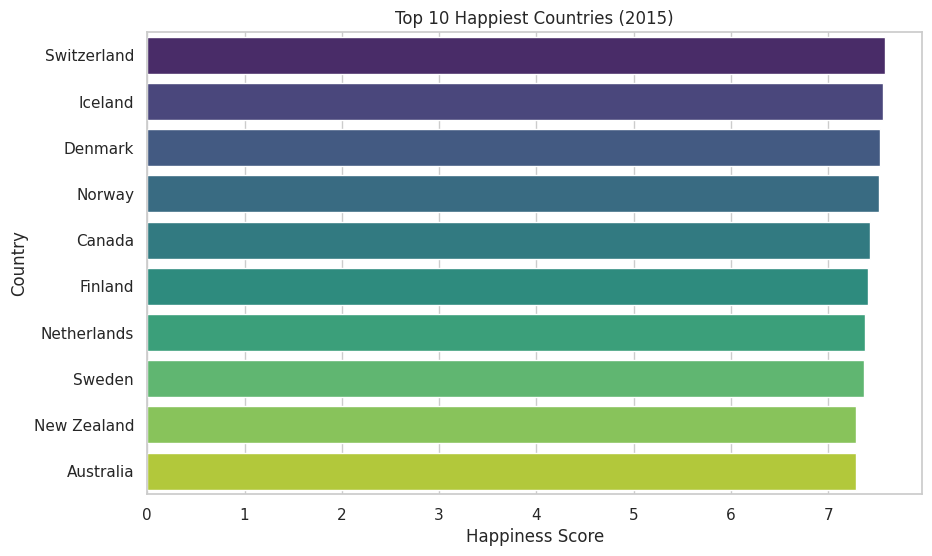

In [ ]:
top10 = df.sort_values(by='Score', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Country', data=top10, palette='viridis')
plt.title('Top 10 Happiest Countries (2015)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

<ipython-input-15-20f5403a8a24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_mean.values, y=region_mean.index, palette='coolwarm')


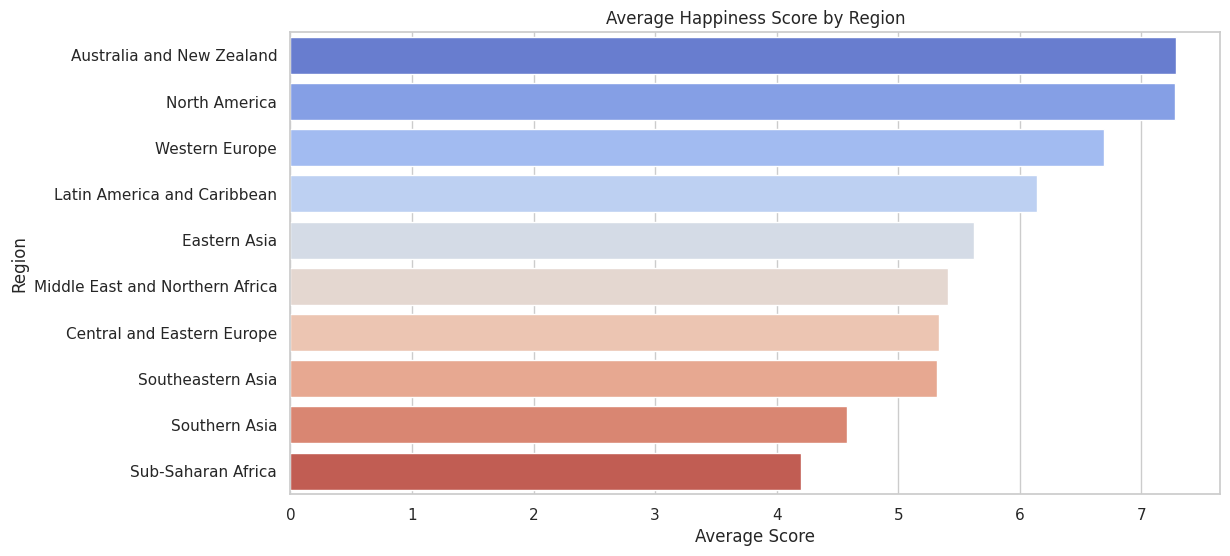

In [ ]:
region_mean = df.groupby('Region')['Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=region_mean.values, y=region_mean.index, palette='coolwarm')
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Score')
plt.ylabel('Region')
plt.show()


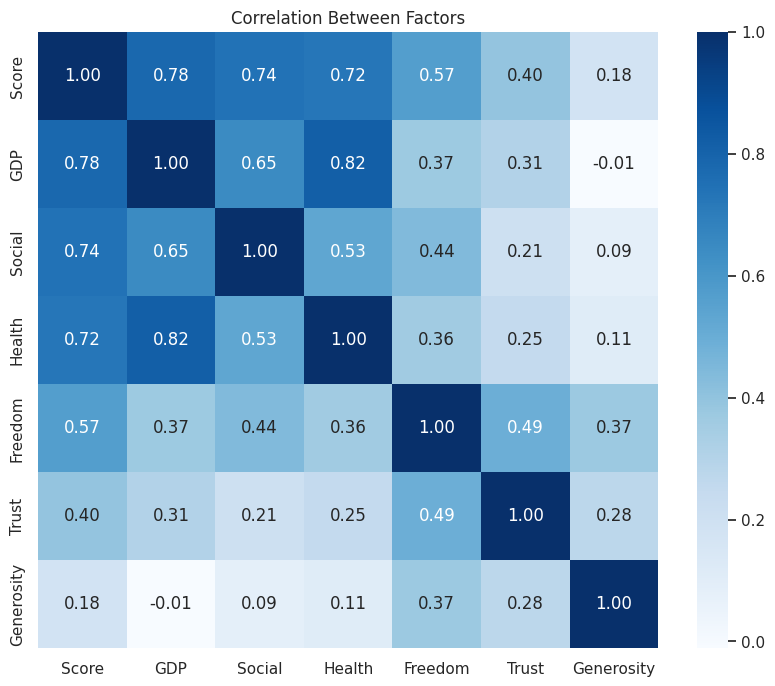

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['Score', 'GDP', 'Social', 'Health', 'Freedom', 'Trust', 'Generosity']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Factors')
plt.show()


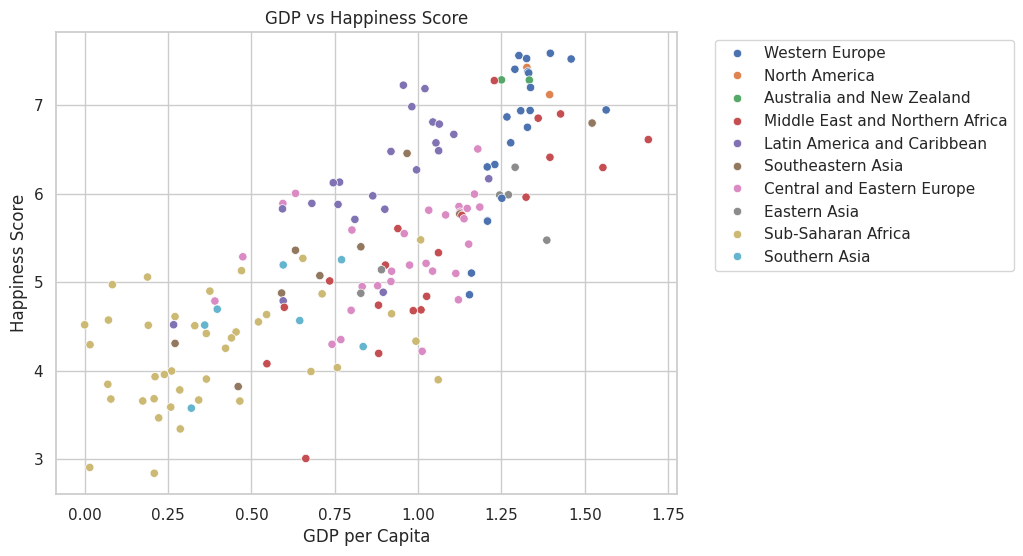

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP', y='Score', data=df, hue='Region')
plt.title('GDP vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


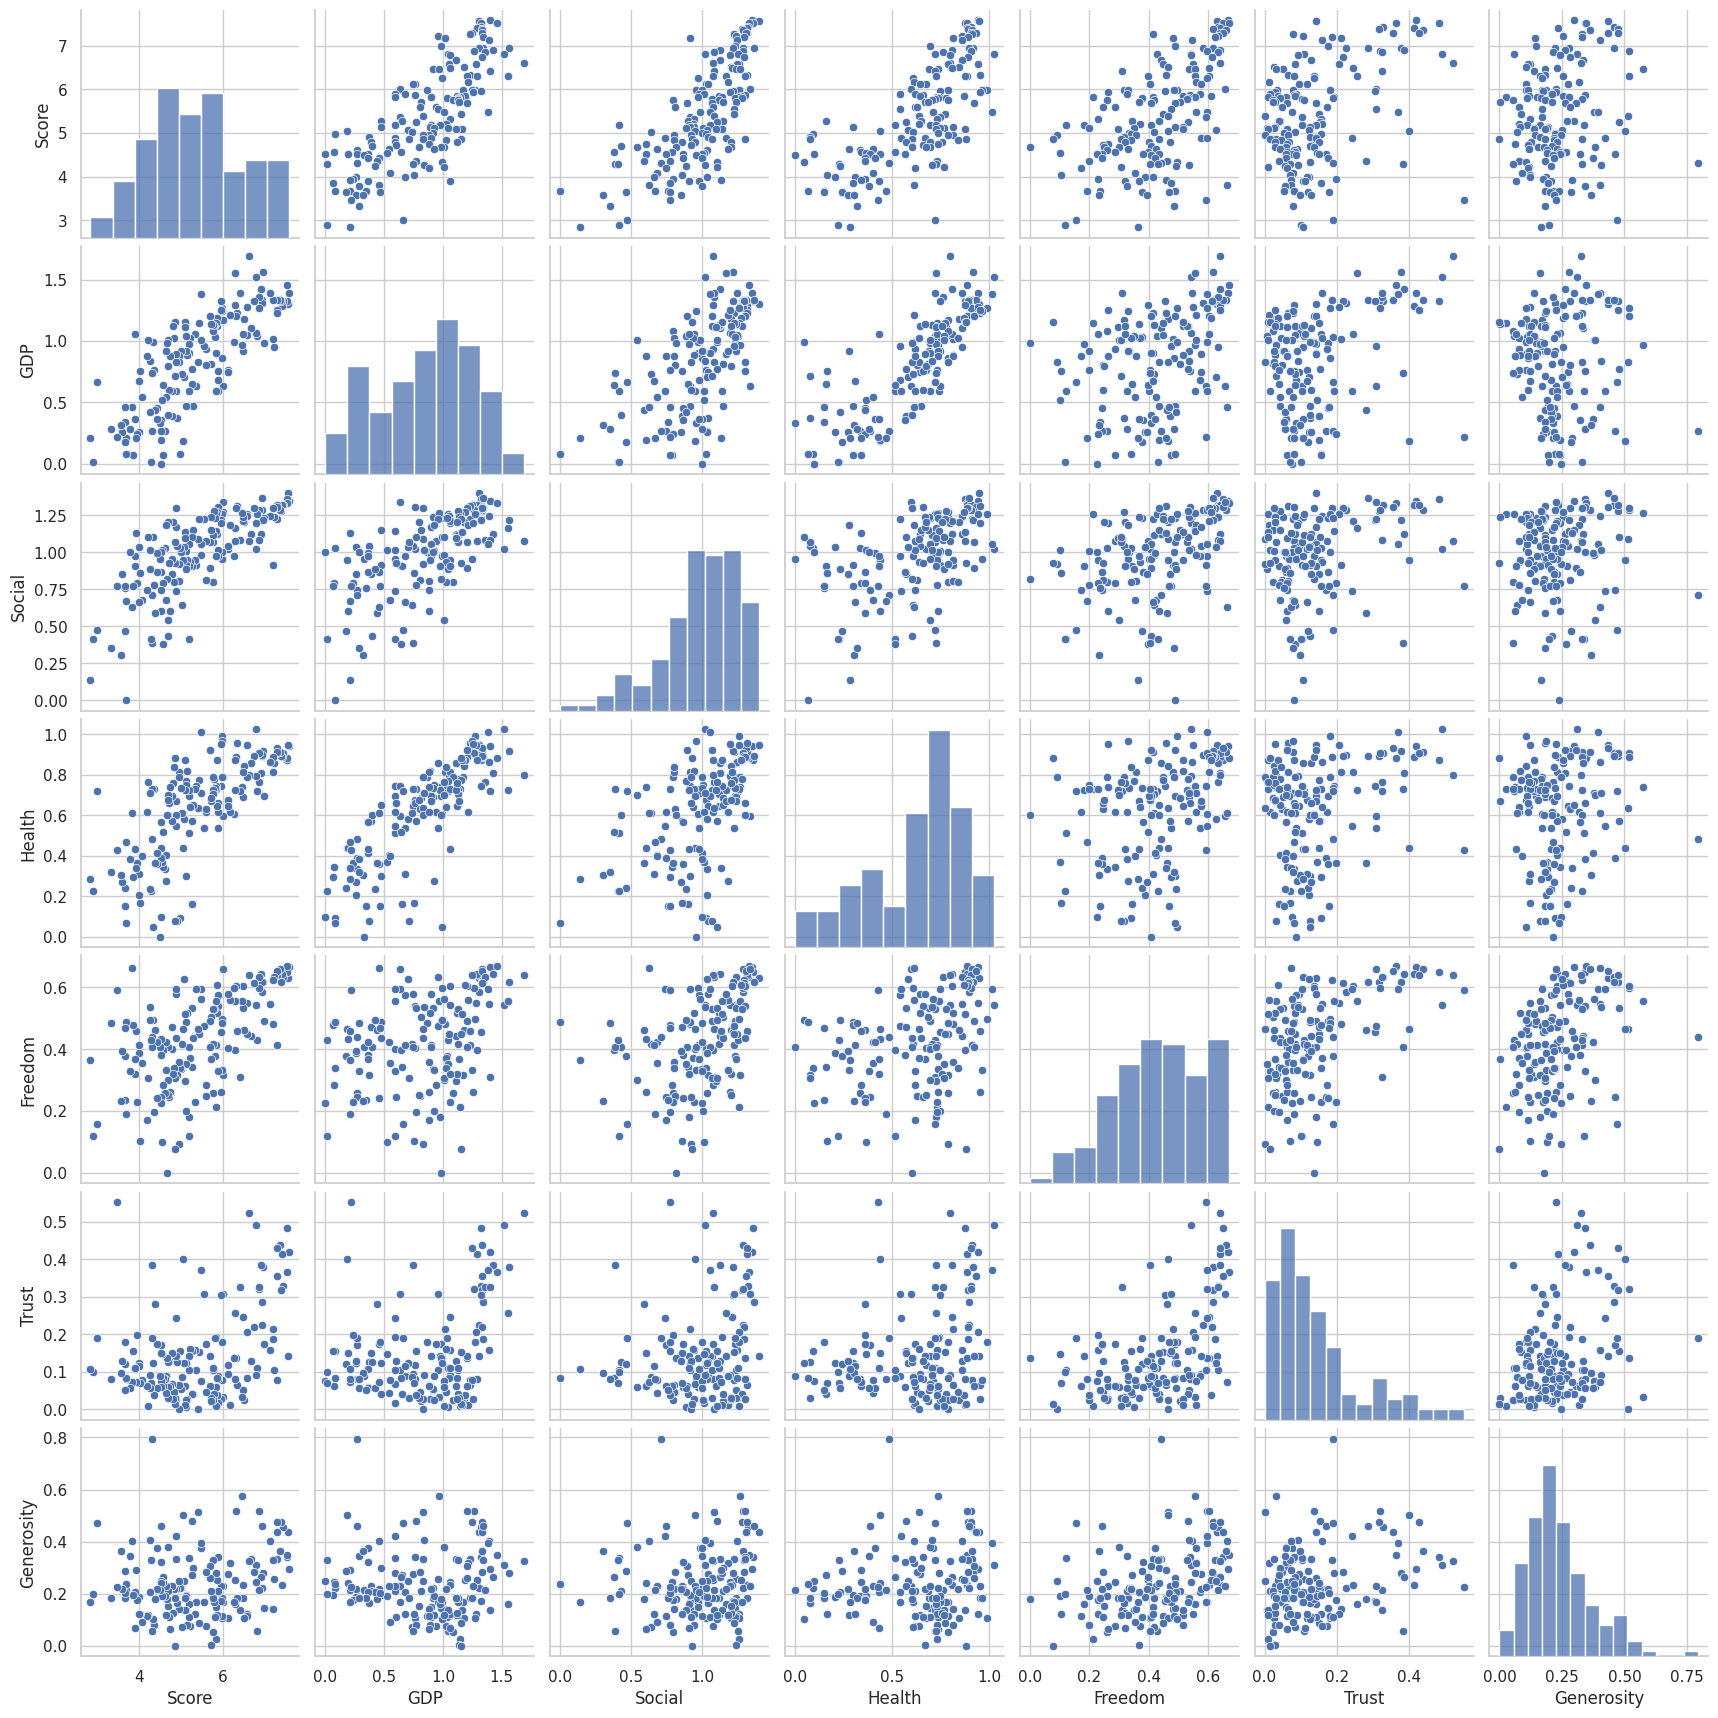

In [ ]:
sns.pairplot(df[['Score', 'GDP', 'Social', 'Health', 'Freedom', 'Trust', 'Generosity']])


## 📌 Key Insights Summary

- Northern European countries like Switzerland, Iceland, and Denmark topped the happiness list in 2015.
- Regions such as **Western Europe** and **North America** had higher average happiness scores compared to others.
- **GDP**, **social support**, and **health** showed the strongest positive correlations with happiness.
- Interestingly, **generosity** and **trust in government** had weaker but still meaningful impacts.
- Economic strength alone isn't enough — social and health-related factors play a key role in people's well-being.


## ✅ Conclusion

This analysis provided a snapshot of global happiness in 2015, showing how economic, social, and governance factors shape human well-being.

It's a reminder that while wealth matters, **health**, **supportive communities**, and **freedom** are also vital for a happy life. 💚

Thank you for reading! 😊
